[US Government Air Quality Index Data For Abuja Municipal Nigeria](https://www.airnow.gov/?city=Abuja%20Municipal&country=NGA)

AirNow DOS collects Air Quality Monitoring data from U.S. embassies and consulates around the world to inform U.S. personnel and citizens overseas.
AirNow DOS is powered by the U.S. Department of State in partnership with the U.S. EPA

In [1]:
# Importin Libraries
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/THESIS/'

Mounted at /content/drive


In [3]:
# list files in path
files = glob.glob(f'{path}/*YTD.csv')

In [4]:
# display files
files

['/content/drive/MyDrive/THESIS/Abuja_PM2.5_2021_YTD.csv',
 '/content/drive/MyDrive/THESIS/Abuja_PM2.5_2022_YTD.csv',
 '/content/drive/MyDrive/THESIS/Abuja_PM2.5_2023_YTD.csv',
 '/content/drive/MyDrive/THESIS/Abuja_PM2.5_2024_YTD.csv']

In [5]:
# combine files
dfs = []
for file in files:
  df = pd.read_csv(file)
  dfs.append(df)
data = pd.concat(dfs, ignore_index=True)

In [6]:
# display top 5 rows
data.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Abuja,PM2.5 - Principal,2021-02-12 09:00 PM,2021,2,12,21,-999.0,-999,NaN,132.3,UG/M3,1 Hr,Valid
1,Abuja,PM2.5 - Principal,2021-02-12 10:00 PM,2021,2,12,22,139.6,194,Unhealthy,146.3,UG/M3,1 Hr,Valid
2,Abuja,PM2.5 - Principal,2021-02-12 11:00 PM,2021,2,12,23,116.8,183,Unhealthy,92.2,UG/M3,1 Hr,Valid
3,Abuja,PM2.5 - Principal,2021-02-13 12:00 AM,2021,2,13,0,116.8,183,Unhealthy,-999.0,UG/M3,1 Hr,Missing
4,Abuja,PM2.5 - Principal,2021-02-13 01:00 AM,2021,2,13,1,65.2,156,Unhealthy,44.1,UG/M3,1 Hr,Valid


In [7]:
# display data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26906 entries, 0 to 26905
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           26906 non-null  object 
 1   Parameter      26906 non-null  object 
 2   Date (LT)      26906 non-null  object 
 3   Year           26906 non-null  int64  
 4   Month          26906 non-null  int64  
 5   Day            26906 non-null  int64  
 6   Hour           26906 non-null  int64  
 7   NowCast Conc.  26906 non-null  float64
 8   AQI            26906 non-null  int64  
 9   AQI Category   26844 non-null  object 
 10  Raw Conc.      26906 non-null  float64
 11  Conc. Unit     26906 non-null  object 
 12  Duration       26906 non-null  object 
 13  QC Name        26906 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 2.9+ MB


In [8]:
# check for null values
data.isna().sum()

,0
Site,0
Parameter,0
Date (LT),0
Year,0
Month,0
Day,0
Hour,0
NowCast Conc.,0
AQI,0
AQI Category,62


In [9]:
# checking data shape
data.shape

(26906, 14)

In [10]:
# displaying rows with 'suspect' QC Name
data[data["QC Name"] == "Suspect"]

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
8028,Abuja,PM2.5 - Principal,2022-02-21 07:00 AM,2022,2,21,7,329.0,379,Hazardous,306.8,UG/M3,1 Hr,Suspect
8029,Abuja,PM2.5 - Principal,2022-02-21 08:00 AM,2022,2,21,8,305.0,355,Hazardous,281.1,UG/M3,1 Hr,Suspect
8695,Abuja,PM2.5 - Principal,2022-03-21 02:00 AM,2022,3,21,2,206.7,257,Very Unhealthy,304.6,UG/M3,1 Hr,Suspect
24180,Abuja,PM2.5 - Principal,2024-02-02 04:00 AM,2024,2,2,4,229.5,309,Hazardous,255.2,UG/M3,1 Hr,Suspect
24181,Abuja,PM2.5 - Principal,2024-02-02 05:00 AM,2024,2,2,5,279.2,408,Hazardous,327.0,UG/M3,1 Hr,Suspect
24182,Abuja,PM2.5 - Principal,2024-02-02 06:00 AM,2024,2,2,6,317.6,484,Hazardous,355.9,UG/M3,1 Hr,Suspect
24183,Abuja,PM2.5 - Principal,2024-02-02 07:00 AM,2024,2,2,7,345.0,539,Hazardous,372.4,UG/M3,1 Hr,Suspect
24184,Abuja,PM2.5 - Principal,2024-02-02 08:00 AM,2024,2,2,8,334.2,518,Hazardous,323.3,UG/M3,1 Hr,Suspect
24185,Abuja,PM2.5 - Principal,2024-02-02 09:00 AM,2024,2,2,9,304.6,459,Hazardous,274.9,UG/M3,1 Hr,Suspect
24186,Abuja,PM2.5 - Principal,2024-02-02 10:00 AM,2024,2,2,10,301.9,453,Hazardous,299.3,UG/M3,1 Hr,Suspect


In [11]:
# counting rows that corresponds to -999 Raw Conc
data[data["Raw Conc."] == -999].count()

,0
Site,41
Parameter,41
Date (LT),41
Year,41
Month,41
Day,41
Hour,41
NowCast Conc.,41
AQI,41
AQI Category,41


In [12]:
# counting rows that corresponds to -999 NowCast Conc
data[data["NowCast Conc."] == -999].count()

,0
Site,62
Parameter,62
Date (LT),62
Year,62
Month,62
Day,62
Hour,62
NowCast Conc.,62
AQI,62
AQI Category,0


In [13]:
# displaying rows with -999 Raw Conc
data[data["Raw Conc."] == -999]

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
3,Abuja,PM2.5 - Principal,2021-02-13 12:00 AM,2021,2,13,0,116.8,183,Unhealthy,-999.0,UG/M3,1 Hr,Missing
2134,Abuja,PM2.5 - Principal,2021-05-12 07:00 PM,2021,5,12,19,28.8,86,Moderate,-999.0,UG/M3,1 Hr,Missing
2687,Abuja,PM2.5 - Principal,2021-06-09 05:00 PM,2021,6,9,17,26.5,81,Moderate,-999.0,UG/M3,1 Hr,Missing
3935,Abuja,PM2.5 - Principal,2021-07-31 05:00 PM,2021,7,31,17,27.2,83,Moderate,-999.0,UG/M3,1 Hr,Missing
5489,Abuja,PM2.5 - Principal,2021-10-06 11:00 AM,2021,10,6,11,21.2,70,Moderate,-999.0,UG/M3,1 Hr,Missing
7655,Abuja,PM2.5 - Principal,2022-01-04 05:00 PM,2022,1,4,17,1.5,6,Good,-999.0,UG/M3,1 Hr,Missing
7698,Abuja,PM2.5 - Principal,2022-01-07 05:00 PM,2022,1,7,17,1.0,4,Good,-999.0,UG/M3,1 Hr,Missing
7750,Abuja,PM2.5 - Principal,2022-01-12 04:00 PM,2022,1,12,16,0.7,3,Good,-999.0,UG/M3,1 Hr,Missing
9233,Abuja,PM2.5 - Principal,2022-04-12 12:00 PM,2022,4,12,12,25.5,79,Moderate,-999.0,UG/M3,1 Hr,Missing
10744,Abuja,PM2.5 - Principal,2022-06-14 11:00 AM,2022,6,14,11,21.4,71,Moderate,-999.0,UG/M3,1 Hr,Missing


In [14]:
# Calculate the mean of 'NowCast Conc.' and 'Raw Conc.'
# excluding the placeholder values
mean_nowcast = data[data['NowCast Conc.'] != -999.0]['NowCast Conc.'].mean()
mean_raw = data[data['Raw Conc.'] != -999]['Raw Conc.'].mean()

# Replace the placeholder values with their respective means
data['NowCast Conc.'] = data['NowCast Conc.'].replace(-999.0, mean_nowcast)
data['Raw Conc.'] = data['Raw Conc.'].replace(-999, mean_raw)

data.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Abuja,PM2.5 - Principal,2021-02-12 09:00 PM,2021,2,12,21,44.182402,-999,NaN,132.30000,UG/M3,1 Hr,Valid
1,Abuja,PM2.5 - Principal,2021-02-12 10:00 PM,2021,2,12,22,139.600000,194,Unhealthy,146.30000,UG/M3,1 Hr,Valid
2,Abuja,PM2.5 - Principal,2021-02-12 11:00 PM,2021,2,12,23,116.800000,183,Unhealthy,92.20000,UG/M3,1 Hr,Valid
3,Abuja,PM2.5 - Principal,2021-02-13 12:00 AM,2021,2,13,0,116.800000,183,Unhealthy,44.15719,UG/M3,1 Hr,Missing
4,Abuja,PM2.5 - Principal,2021-02-13 01:00 AM,2021,2,13,1,65.200000,156,Unhealthy,44.10000,UG/M3,1 Hr,Valid


In [15]:
data.isna().sum()

,0
Site,0
Parameter,0
Date (LT),0
Year,0
Month,0
Day,0
Hour,0
NowCast Conc.,0
AQI,0
AQI Category,62


In [16]:
aqi_categories = {}

# Iterate through the DataFrame to dynamically determine categories
for index, row in data.iterrows():
    aqi_value = row['AQI']
    aqi_category = row['AQI Category']

    if aqi_category not in aqi_categories:
        aqi_categories[aqi_category] = {'min': aqi_value, 'max': aqi_value}
    else:
        # Update min and max values for the category
        aqi_categories[aqi_category]['min'] = min(aqi_categories[aqi_category]['min'], aqi_value)
        aqi_categories[aqi_category]['max'] = max(aqi_categories[aqi_category]['max'], aqi_value)

# Print the dynamically generated AQI categories and their ranges
for category, ranges in aqi_categories.items():
    print(f"Category: {category}, Min: {ranges['min']}, Max: {ranges['max']}")

Category: nan, Min: -999, Max: -999
Category: Unhealthy, Min: 151, Max: 200
Category: Unhealthy for Sensitive Groups, Min: 101, Max: 150
Category: Moderate, Min: 51, Max: 100
Category: Very Unhealthy, Min: 201, Max: 300
Category: Hazardous, Min: 301, Max: 682
Category: Good, Min: 0, Max: 50


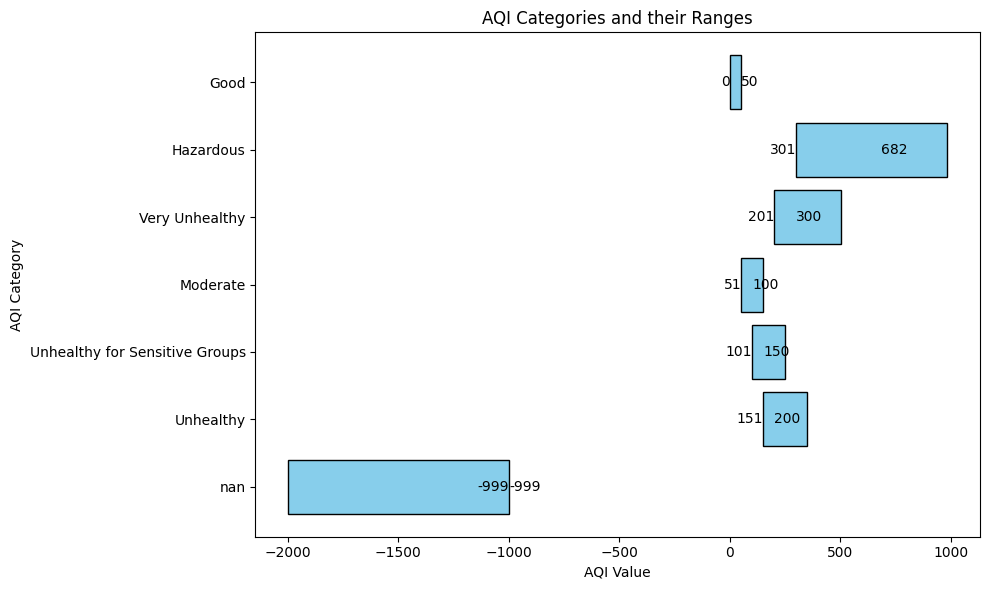

In [17]:
categories = [str(k) for k in aqi_categories.keys()] # Convert keys to strings
min_values = [ranges['min'] for ranges in aqi_categories.values()]
max_values = [ranges['max'] for ranges in aqi_categories.values()]

plt.figure(figsize=(10, 6))
plt.barh(categories, max_values, left=min_values, color='skyblue', edgecolor='black')
plt.xlabel('AQI Value')
plt.ylabel('AQI Category')
plt.title('AQI Categories and their Ranges')

# Add labels for min and max values to the bars
for i, (min_val, max_val) in enumerate(zip(min_values, max_values)):
    plt.text(min_val, i, str(min_val), va='center', ha='right', color='black')
    plt.text(max_val, i, str(max_val), va='center', ha='left', color='black')

plt.tight_layout()
plt.show()

-  Conc. unit = ug/m3 (micrograms per cubic meter)
-  AQI Category: The health category associated with the AQI value. Categories include "Good," "Moderate," "Unhealthy for Sensitive Groups,"
- "Unhealthy," "Very Unhealthy," and "Hazardous". In the example, "Unhealthy".

In [18]:
# Define AQI categories and their corresponding ranges
aqi_categories = {
    'Good': (0, 50),
    'Moderate': (51, 100),
    'Unhealthy for Sensitive Groups': (101, 150),
    'Unhealthy': (151, 200),
    'Very Unhealthy': (201, 300),
    'Hazardous': (301, 682)
}

# Function to get AQI category based on AQI value
def get_aqi_category(aqi_value):
    for category, (lower, upper) in aqi_categories.items():
        if lower <= aqi_value <= upper:
            return category
    return 'Unknown'  # Handle cases outside the defined ranges

# Calculate mean AQI
mean_aqi = data['AQI'].mean()

# Determine the AQI category of the mean AQI
mean_aqi_category = get_aqi_category(mean_aqi)

# Replace nulls in 'AQI Category' with the mean AQI category
data['AQI Category'] = data['AQI Category'].fillna(mean_aqi_category)

data.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Abuja,PM2.5 - Principal,2021-02-12 09:00 PM,2021,2,12,21,44.182402,-999,Moderate,132.30000,UG/M3,1 Hr,Valid
1,Abuja,PM2.5 - Principal,2021-02-12 10:00 PM,2021,2,12,22,139.600000,194,Unhealthy,146.30000,UG/M3,1 Hr,Valid
2,Abuja,PM2.5 - Principal,2021-02-12 11:00 PM,2021,2,12,23,116.800000,183,Unhealthy,92.20000,UG/M3,1 Hr,Valid
3,Abuja,PM2.5 - Principal,2021-02-13 12:00 AM,2021,2,13,0,116.800000,183,Unhealthy,44.15719,UG/M3,1 Hr,Missing
4,Abuja,PM2.5 - Principal,2021-02-13 01:00 AM,2021,2,13,1,65.200000,156,Unhealthy,44.10000,UG/M3,1 Hr,Valid


In [19]:
# Calculate median of AQI and replace rows with -999 entries with it
median_aqi = data[data['AQI'] != -999]['AQI'].median()
data['AQI'] = data['AQI'].replace(-999, median_aqi)

In [20]:
data.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Abuja,PM2.5 - Principal,2021-02-12 09:00 PM,2021,2,12,21,44.182402,84,Moderate,132.30000,UG/M3,1 Hr,Valid
1,Abuja,PM2.5 - Principal,2021-02-12 10:00 PM,2021,2,12,22,139.600000,194,Unhealthy,146.30000,UG/M3,1 Hr,Valid
2,Abuja,PM2.5 - Principal,2021-02-12 11:00 PM,2021,2,12,23,116.800000,183,Unhealthy,92.20000,UG/M3,1 Hr,Valid
3,Abuja,PM2.5 - Principal,2021-02-13 12:00 AM,2021,2,13,0,116.800000,183,Unhealthy,44.15719,UG/M3,1 Hr,Missing
4,Abuja,PM2.5 - Principal,2021-02-13 01:00 AM,2021,2,13,1,65.200000,156,Unhealthy,44.10000,UG/M3,1 Hr,Valid


The NowCast Conc. represents an estimated concentration of PM2.5 that reflects recent air quality conditions. It's not a direct measurement but rather an adjusted value that uses a specific algorithm to weigh recent and past PM2.5 readings, providing a real-time snapshot of air quality.

NowCast Concentration: An estimate that combines recent PM2.5 measurements with past data to provide a more current air quality reading.
PM2.5 Values: Direct measurements of particulate matter with a diameter of 2.5 micrometers or less, recorded over a specified period (e.g., hourly).

NowCast Conc.: 139.6 UG/M3
This is an estimated value reflecting the recent air quality conditions.
Raw Conc.: 146.3 UG/M3
This is the actual PM2.5 concentration measured at that specific hour.
Understanding the Relationship:
NowCast Conc. helps provide a more immediate understanding of air quality, smoothing out short-term fluctuations by considering recent trends.
Raw Conc. provides the specific, measured PM2.5 concentration at a given time without any smoothing or adjustments.
Purpose of NowCast:
The NowCast algorithm is used to provide a more accurate real-time assessment of air quality. It adjusts based on recent changes in pollution levels, aiming to give the public a better sense of current conditions, especially useful during rapidly changing events like wildfires or dust storms.

In Summary:
Yes, the NowCast Conc. is related to PM2.5 values, but it is an adjusted concentration reflecting more immediate air quality conditions, rather than the raw hourly measurement.


In [21]:
data[data['QC Name'] == "Invalid"]

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
9360,Abuja,PM2.5 - Principal,2022-04-17 07:00 PM,2022,4,17,19,26.600000,81,Moderate,14.7,UG/M3,1 Hr,Invalid
9361,Abuja,PM2.5 - Principal,2022-04-17 08:00 PM,2022,4,17,20,44.182402,84,Moderate,14.7,UG/M3,1 Hr,Invalid
9362,Abuja,PM2.5 - Principal,2022-04-17 09:00 PM,2022,4,17,21,44.182402,84,Moderate,14.7,UG/M3,1 Hr,Invalid
9363,Abuja,PM2.5 - Principal,2022-04-17 10:00 PM,2022,4,17,22,44.182402,84,Moderate,14.7,UG/M3,1 Hr,Invalid
9364,Abuja,PM2.5 - Principal,2022-04-17 11:00 PM,2022,4,17,23,44.182402,84,Moderate,14.7,UG/M3,1 Hr,Invalid
9365,Abuja,PM2.5 - Principal,2022-04-18 12:00 AM,2022,4,18,0,44.182402,84,Moderate,14.7,UG/M3,1 Hr,Invalid
9366,Abuja,PM2.5 - Principal,2022-04-18 01:00 AM,2022,4,18,1,44.182402,84,Moderate,14.7,UG/M3,1 Hr,Invalid
9367,Abuja,PM2.5 - Principal,2022-04-18 02:00 AM,2022,4,18,2,44.182402,84,Moderate,14.7,UG/M3,1 Hr,Invalid
9368,Abuja,PM2.5 - Principal,2022-04-18 03:00 AM,2022,4,18,3,44.182402,84,Moderate,14.7,UG/M3,1 Hr,Invalid
9369,Abuja,PM2.5 - Principal,2022-04-18 04:00 AM,2022,4,18,4,44.182402,84,Moderate,14.7,UG/M3,1 Hr,Invalid


In [22]:
og_data = data.copy()

In [23]:
data = data[["Date (LT)", "NowCast Conc.", "Raw Conc.", "AQI","AQI Category" ]]

In [24]:
data.head()

,Date (LT),NowCast Conc.,Raw Conc.,AQI,AQI Category
0,2021-02-12 09:00 PM,44.182402,132.30000,84,Moderate
1,2021-02-12 10:00 PM,139.600000,146.30000,194,Unhealthy
2,2021-02-12 11:00 PM,116.800000,92.20000,183,Unhealthy
3,2021-02-13 12:00 AM,116.800000,44.15719,183,Unhealthy
4,2021-02-13 01:00 AM,65.200000,44.10000,156,Unhealthy


In [25]:
columns = ["ds", "NowCastConc.", "y", "AQI", "AQI Category"]
data.columns = columns
data.head()

,ds,NowCastConc.,y,AQI,AQI Category
0,2021-02-12 09:00 PM,44.182402,132.30000,84,Moderate
1,2021-02-12 10:00 PM,139.600000,146.30000,194,Unhealthy
2,2021-02-12 11:00 PM,116.800000,92.20000,183,Unhealthy
3,2021-02-13 12:00 AM,116.800000,44.15719,183,Unhealthy
4,2021-02-13 01:00 AM,65.200000,44.10000,156,Unhealthy


In [26]:
#data['ds'] = pd.to_datetime(data['ds']).dt.strftime('%Y-%m-%d %H:%M:%S')
data["ds"] = pd.to_datetime(data["ds"])

<ipython-input-26-0e2458ac864a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["ds"] = pd.to_datetime(data["ds"])


In [27]:
data.head()

,ds,NowCastConc.,y,AQI,AQI Category
0,2021-02-12 21:00:00,44.182402,132.30000,84,Moderate
1,2021-02-12 22:00:00,139.600000,146.30000,194,Unhealthy
2,2021-02-12 23:00:00,116.800000,92.20000,183,Unhealthy
3,2021-02-13 00:00:00,116.800000,44.15719,183,Unhealthy
4,2021-02-13 01:00:00,65.200000,44.10000,156,Unhealthy


In [28]:
data.tail()

,ds,NowCastConc.,y,AQI,AQI Category
26901,2024-05-31 20:00:00,21.7,24.7,74,Moderate
26902,2024-05-31 21:00:00,26.3,31.5,83,Moderate
26903,2024-05-31 22:00:00,29.4,33.0,89,Moderate
26904,2024-05-31 23:00:00,27.4,24.9,85,Moderate
26905,2024-06-01 00:00:00,21.6,15.7,74,Moderate


In [29]:
data.isna().sum()

,0
ds,0
NowCastConc.,0
y,0
AQI,0
AQI Category,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26906 entries, 0 to 26905
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            26906 non-null  datetime64[ns]
 1   NowCastConc.  26906 non-null  float64       
 2   y             26906 non-null  float64       
 3   AQI           26906 non-null  int64         
 4   AQI Category  26906 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 1.0+ MB


In [31]:
df = data['ds'].copy()

# Check for missing dates
expected_datetimes = pd.date_range(start='2021-02-12 21:00:00', end='2024-06-01 00:00:00', freq='H')
missing_datetimes = expected_datetimes[~expected_datetimes.isin(data['ds'])]

# Print results
if missing_datetimes.empty:
    print("All datetimes are present in order.")
else:
    print("Missing datetimes:")
    print(missing_datetimes)
    print(f"There are: {len(missing_datetimes)} datetimes")

Missing datetimes:
DatetimeIndex(['2021-05-12 20:00:00', '2021-05-12 21:00:00',
               '2021-05-12 22:00:00', '2021-05-12 23:00:00',
               '2021-05-13 00:00:00', '2021-05-13 01:00:00',
               '2021-05-13 02:00:00', '2021-05-13 03:00:00',
               '2021-05-13 04:00:00', '2021-05-13 05:00:00',
               ...
               '2024-05-13 06:00:00', '2024-05-13 07:00:00',
               '2024-05-13 08:00:00', '2024-05-13 09:00:00',
               '2024-05-13 10:00:00', '2024-05-13 11:00:00',
               '2024-05-13 12:00:00', '2024-05-13 13:00:00',
               '2024-05-13 14:00:00', '2024-05-13 15:00:00'],
              dtype='datetime64[ns]', length=1994, freq=None)
There are: 1994 datetimes


In [32]:
data.reset_index()

,index,ds,NowCastConc.,y,AQI,AQI Category
0,0,2021-02-12 21:00:00,44.182402,132.30000,84,Moderate
1,1,2021-02-12 22:00:00,139.600000,146.30000,194,Unhealthy
2,2,2021-02-12 23:00:00,116.800000,92.20000,183,Unhealthy
3,3,2021-02-13 00:00:00,116.800000,44.15719,183,Unhealthy
4,4,2021-02-13 01:00:00,65.200000,44.10000,156,Unhealthy
...,...,...,...,...,...,...
26901,26901,2024-05-31 20:00:00,21.700000,24.70000,74,Moderate
26902,26902,2024-05-31 21:00:00,26.300000,31.50000,83,Moderate
26903,26903,2024-05-31 22:00:00,29.400000,33.00000,89,Moderate
26904,26904,2024-05-31 23:00:00,27.400000,24.90000,85,Moderate


In [33]:
# Create DataFrame for missing datetimes (with dtype)
missing_df = pd.DataFrame({'ds': missing_datetimes.astype('datetime64[ns]')})
# missing_df = missing_df.set_index('ds')

# Concatenate with the original DataFrame
data = pd.concat([data, missing_df])

# Sort the DataFrame by the 'ds' column
data = data.sort_values(by='ds')

# Fill missing values with the mean of 'AQI'
data['AQI'] = data['AQI'].fillna(data['AQI'].mean())

In [34]:
# Define AQI categories and their corresponding ranges
aqi_categories = {
    'Good': (0, 50),
    'Moderate': (51, 100),
    'Unhealthy for Sensitive Groups': (101, 150),
    'Unhealthy': (151, 200),
    'Very Unhealthy': (201, 300),
    'Hazardous': (301, 682)
}

# Function to get AQI category based on AQI value
def get_aqi_category(aqi_value):
    for category, (lower, upper) in aqi_categories.items():
        if lower <= aqi_value <= upper:
            return category
    return 'Unknown'  # Handle cases outside the defined ranges

# Calculate mean AQI
mean_aqi = data['AQI'].mean()

# Determine the AQI category of the mean AQI
mean_aqi_category = get_aqi_category(mean_aqi)

# Replace nulls in 'AQI Category' with the mean AQI category
data['AQI Category'] = data['AQI Category'].fillna(mean_aqi_category)

data.head()

,ds,NowCastConc.,y,AQI,AQI Category
0,2021-02-12 21:00:00,44.182402,132.30000,84.0,Moderate
1,2021-02-12 22:00:00,139.600000,146.30000,194.0,Unhealthy
2,2021-02-12 23:00:00,116.800000,92.20000,183.0,Unhealthy
3,2021-02-13 00:00:00,116.800000,44.15719,183.0,Unhealthy
4,2021-02-13 01:00:00,65.200000,44.10000,156.0,Unhealthy


In [35]:
data['NowCastConc.'] = data['NowCastConc.'].fillna(mean_nowcast)

In [36]:
mean_y = data[data['y'] != -999.0]['y'].mean()
data['y'] = data['y'].fillna(mean_y)

data.head()

,ds,NowCastConc.,y,AQI,AQI Category
0,2021-02-12 21:00:00,44.182402,132.30000,84.0,Moderate
1,2021-02-12 22:00:00,139.600000,146.30000,194.0,Unhealthy
2,2021-02-12 23:00:00,116.800000,92.20000,183.0,Unhealthy
3,2021-02-13 00:00:00,116.800000,44.15719,183.0,Unhealthy
4,2021-02-13 01:00:00,65.200000,44.10000,156.0,Unhealthy


In [37]:
data.isna().sum()

,0
ds,0
NowCastConc.,0
y,0
AQI,0
AQI Category,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28900 entries, 0 to 26905
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            28900 non-null  datetime64[ns]
 1   NowCastConc.  28900 non-null  float64       
 2   y             28900 non-null  float64       
 3   AQI           28900 non-null  float64       
 4   AQI Category  28900 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.3+ MB


In [39]:
data1 = data.copy()
data1['ds'] = pd.to_datetime(data1['ds'])  # Convert 'date' column to datetime objects
data1.set_index('ds', inplace=True)  # Set 'date' as the index

In [40]:
data1.isna().sum()

,0
NowCastConc.,0
y,0
AQI,0
AQI Category,0


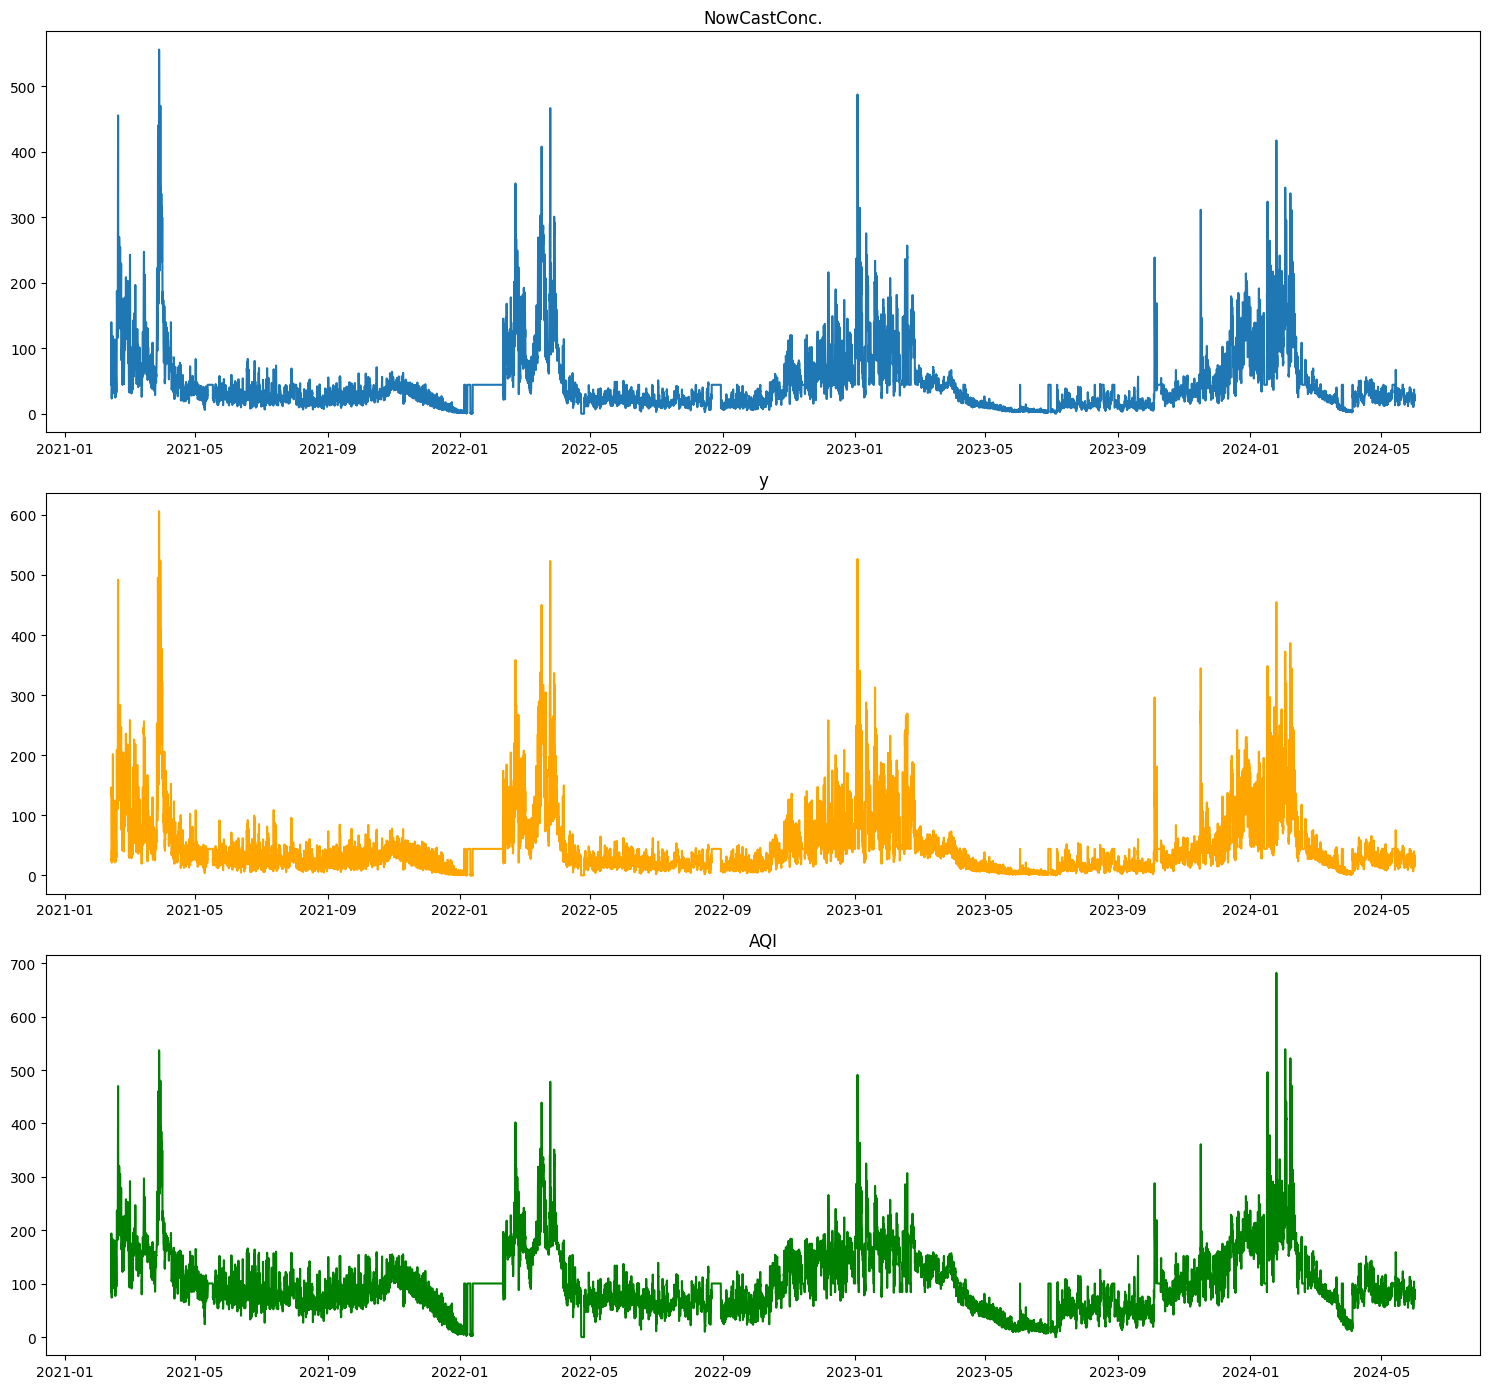

In [41]:
fig, axs = plt.subplots(3, 1, figsize=(15, 14))

axs[0].plot(data1['NowCastConc.'])
axs[0].set_title('NowCastConc.')
axs[1].plot(data1['y'], c='orange')
axs[1].set_title('y')
axs[2].plot(data1['AQI'], c='green')
axs[2].set_title('AQI')

plt.tight_layout()
plt.show()

In [42]:
fig = px.scatter(data, x='ds', y='y', color='AQI Category', title='PM2.5 over Time by AQI Category')
fig.show()

In [43]:
fig = px.line(df, x=data.ds, y=data.y, title='PM2.5 Series Plot over time')
fig.show()

# ARIMA

In [44]:
data2 = data[['ds', 'AQI']]

In [45]:
data2 = data2.set_index('ds')

In [46]:
data2

,AQI
ds,
2021-02-12 21:00:00,84.0
2021-02-12 22:00:00,194.0
2021-02-12 23:00:00,183.0
2021-02-13 00:00:00,183.0
2021-02-13 01:00:00,156.0
...,...
2024-05-31 20:00:00,74.0
2024-05-31 21:00:00,83.0
2024-05-31 22:00:00,89.0


In [47]:
data2 = data2.asfreq('H')

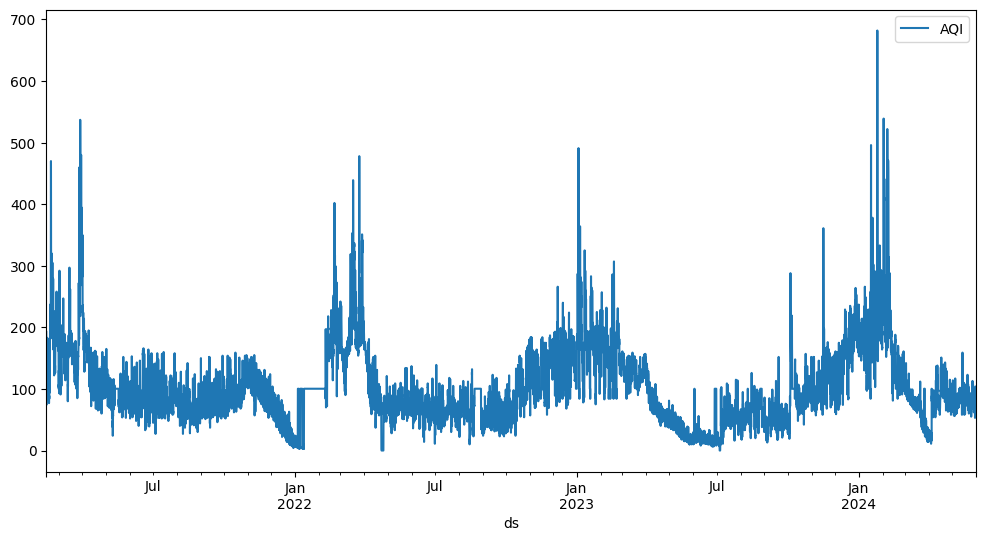

In [48]:
data2.plot(figsize=(12, 6))  # Set figsize within data2.plot()
plt.show()

In [49]:
### Stationarity Test
from statsmodels.tsa.stattools import adfuller

In [50]:
test_result = adfuller(data2["AQI"])

In [51]:
# H0: It is non stationary and p-value <= 0.05
# H1: It is stationary

def adfuller_test(AQI):
    result = adfuller(AQI)
    labels = ["ADF Test Statistics","p-value","#Lags used","Number of observations used"]
    for value, label in zip(result,labels):
        print(label+ ":" +str(value))
    if result[1]<=0.05:
        print("Reject the null hypothesis which states that data is non stationary: Hence, data is staionary")
    else:
        print("Fail to reject the null hypothesis which states that data is non stationary: Hence, data is not stationary")

In [52]:
adfuller_test(data2["AQI"])

ADF Test Statistics:-7.482800609473437
p-value:4.7235876588482584e-11
#Lags used:48
Number of observations used:28851
Reject the null hypothesis which states that data is non stationary: Hence, data is staionary


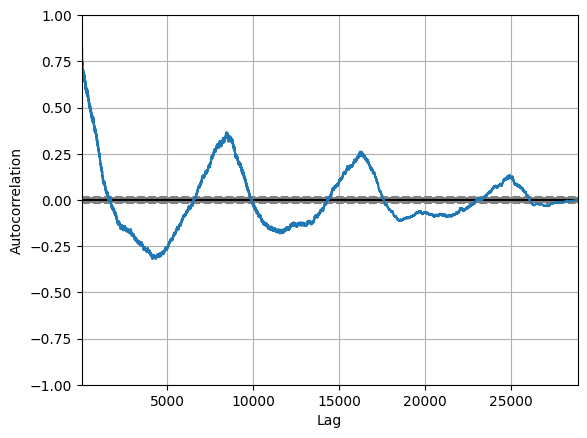

In [53]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data2["AQI"])
plt.show()

## SARIMA Model

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [55]:
# KPSS Test
def kpss_test(series):
    print('KPSS Test')
    statistic, p_value, n_lags, critical_values = kpss(series)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Critical Values:')
    for key, value in critical_values.items():
        print(f'\t{key}: {value}')
    print('Null hypothesis: The series is stationary.')
    print('Alternative hypothesis: The series is not stationary.')

kpss_test(data2['AQI'])

KPSS Test
KPSS Statistic: 0.5766161013581627
p-value: 0.02476217260380339
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Null hypothesis: The series is stationary.
Alternative hypothesis: The series is not stationary.


### KPSS Test on Original Data

- KPSS Statistic: 0.5766161013581625
- p-value: 0.02476217260380302
- The p-value is less than 0.05, which suggests rejecting the null hypothesis of stationarity.
- This indicates that the original series is not stationary.

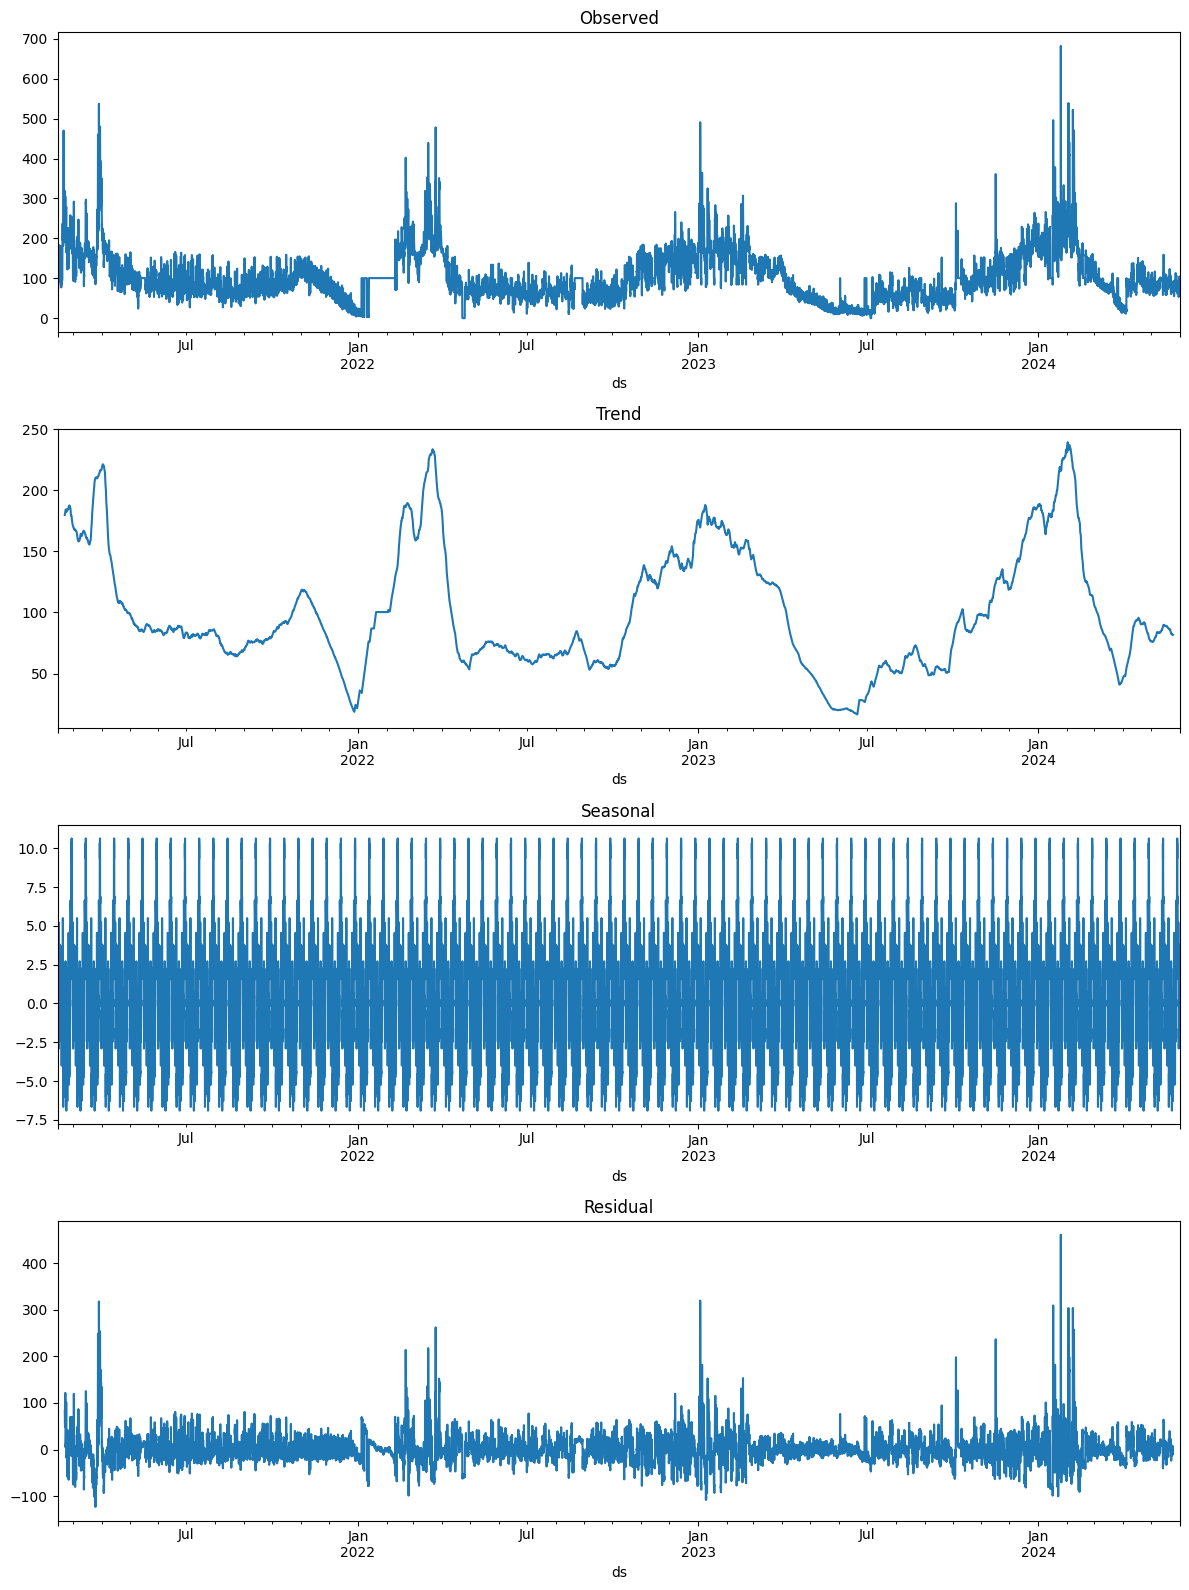

In [56]:
# Seasonal Decomposition
result = seasonal_decompose(data2['AQI'], model='additive', period=365)  # Assuming daily data with annual seasonality

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

- The observed data shows clear seasonal patterns and some irregular spikes.
- The trend component indicates long-term changes in the data.
- The seasonal component shows a consistent pattern, confirming the presence of seasonality.
- The residual component still shows some patterns and large spikes, suggesting there might be other factors influencing the data.

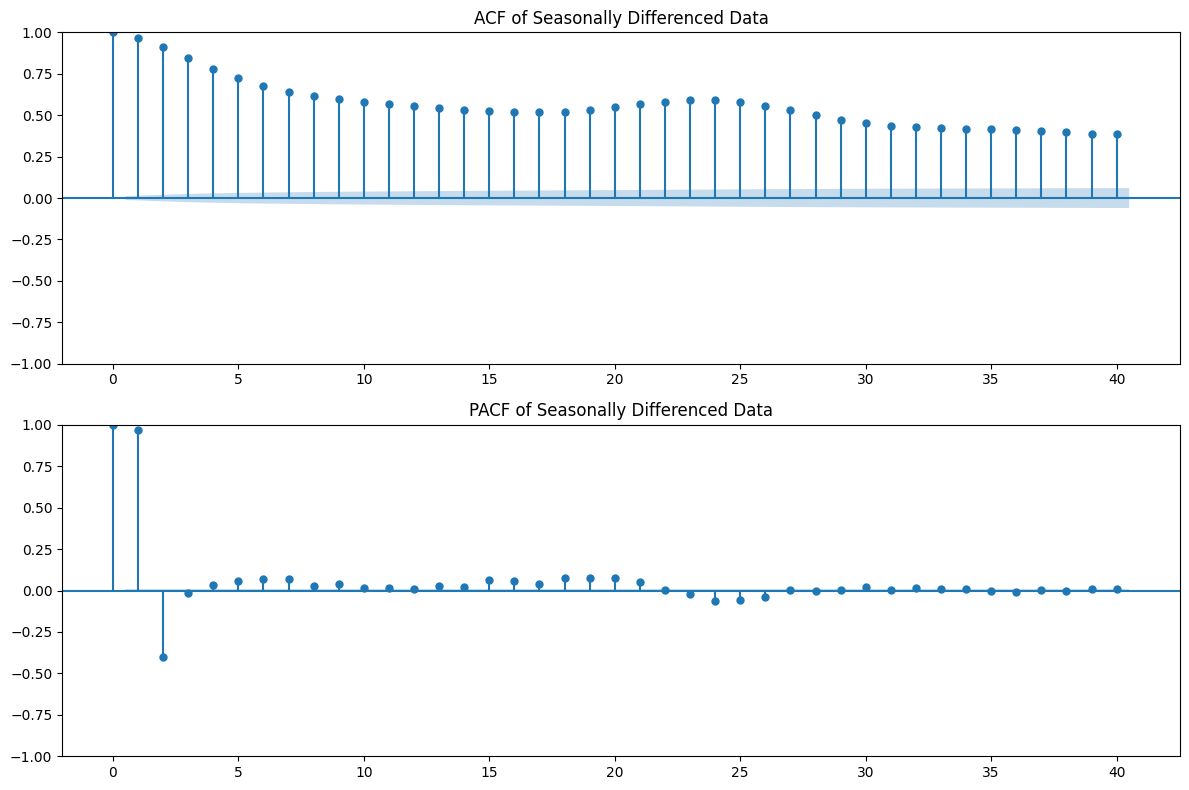

In [57]:
# 3. Seasonal Differencing
seasonal_diff = data2['AQI'] - data2['AQI'].shift(365)
seasonal_diff = seasonal_diff.dropna()

# Plot ACF and PACF of seasonally differenced data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(seasonal_diff, ax=ax1, lags=40)
ax1.set_title('ACF of Seasonally Differenced Data')
plot_pacf(seasonal_diff, ax=ax2, lags=40)
ax2.set_title('PACF of Seasonally Differenced Data')
plt.tight_layout()
plt.show()

In [58]:
# KPSS test on seasonally differenced data
kpss_test(seasonal_diff)

KPSS Test
KPSS Statistic: 0.13864196940316326
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Null hypothesis: The series is stationary.
Alternative hypothesis: The series is not stationary.


<ipython-input-55-1770a6edef3b>:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




### KPSS Test on Seasonally Differenced Data

- KPSS Statistic: 0.13864196948316334
- p-value: 0.1
- The p-value is greater than 0.05, which suggests failing to reject the null hypothesis of stationarity.
- This indicates that the seasonally differenced series is stationary.

In [59]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.6 MB/s eta 0:00:00


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from pmdarima import auto_arima

# 1. Model Selection and 2. Parameter Identification
def plot_acf_pacf(series):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(series, ax=ax1, lags=40)
    plot_pacf(series, ax=ax2, lags=40)
    plt.tight_layout()
    plt.show()

Model Selection: Since the original series is not stationary but becomes stationary after seasonal differencing, a Seasonal ARIMA (SARIMA) model will be used.
- The model will need to account for both regular and seasonal differencing.
- Use the ACF and PACF plots of the seasonally differenced data to identify potential AR and MA orders for both the regular and seasonal components of the SARIMA model.

In [61]:
# Model Fitting
# Use auto_arima to automatically select the best parameters
# auto_model = auto_arima(data2['AQI'], seasonal=True, m=365,
#                         start_p=0, start_q=0, max_p=2, max_q=2,
#                         start_P=0, start_Q=0, max_P=1, max_Q=1,
#                         d=None, D=1, trace=True, error_action='ignore',
#                         suppress_warnings=True, stepwise=True)

# print(auto_model.summary())

model = SARIMAX(data2['AQI'], order=(2, 0, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                AQI   No. Observations:                28900
Model:             SARIMAX(2, 0, 1)x(1, 1, 1, 12)   Log Likelihood             -103600.779
Date:                            Thu, 26 Sep 2024   AIC                         207213.558
Time:                                    11:34:29   BIC                         207263.185
Sample:                                02-12-2021   HQIC                        207229.510
                                     - 06-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3651      0.008    172.363      0.000       1.350       1.381
ar.L2         -0.4059      0.008   

Model Diagnostics:

- Check the residuals of the chosen model for any remaining autocorrelation or heteroscedasticity.
- Perform Ljung-Box test on the residuals to ensure they resemble white noise.

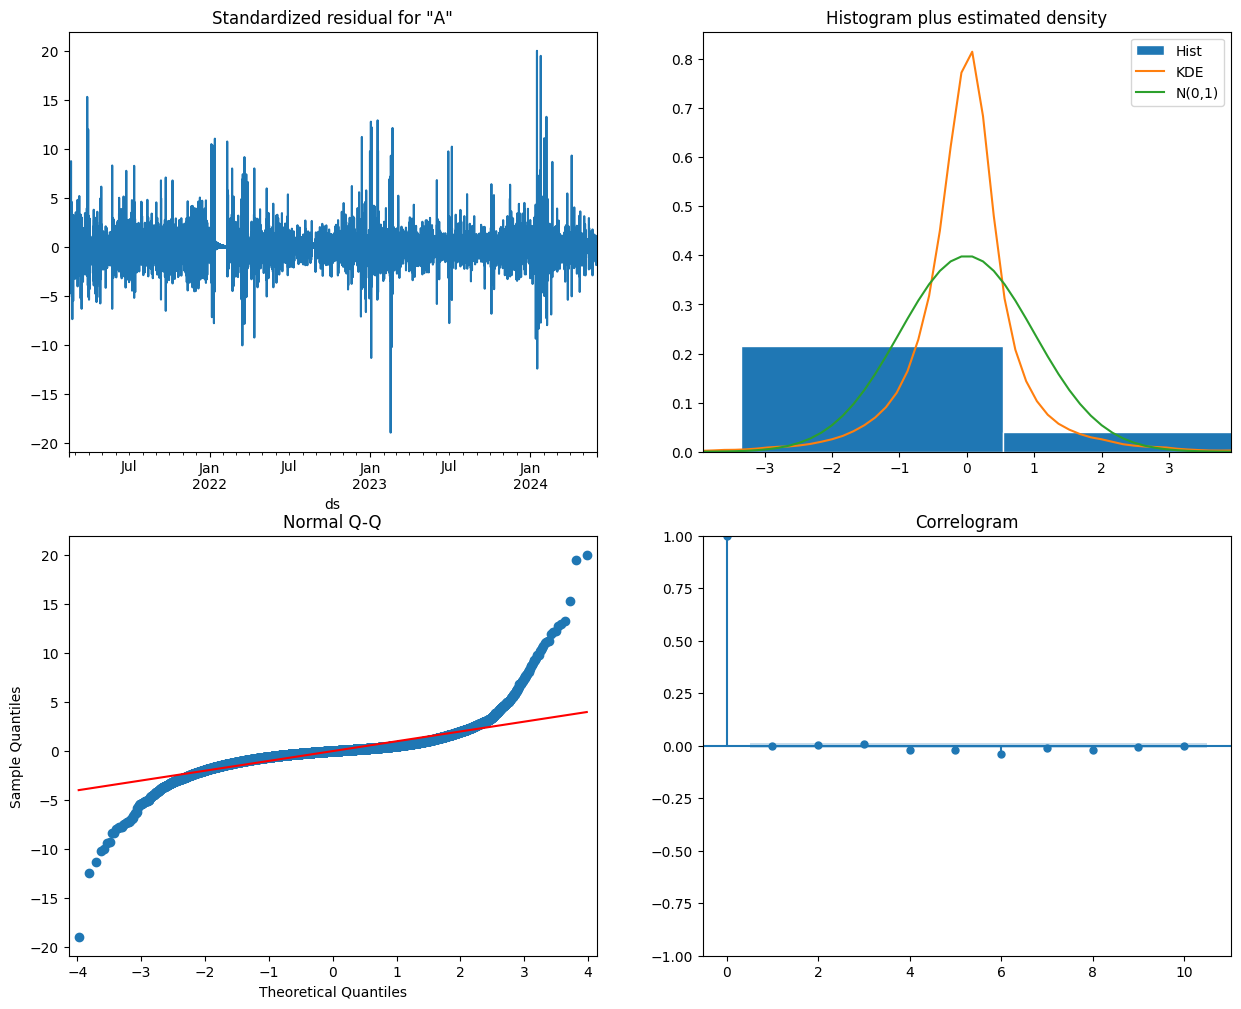

Ljung-Box Test Results:
       lb_stat      lb_pvalue
10  387.408662   4.494055e-77
20  414.225814   2.276693e-75
30  997.918001  1.411540e-190


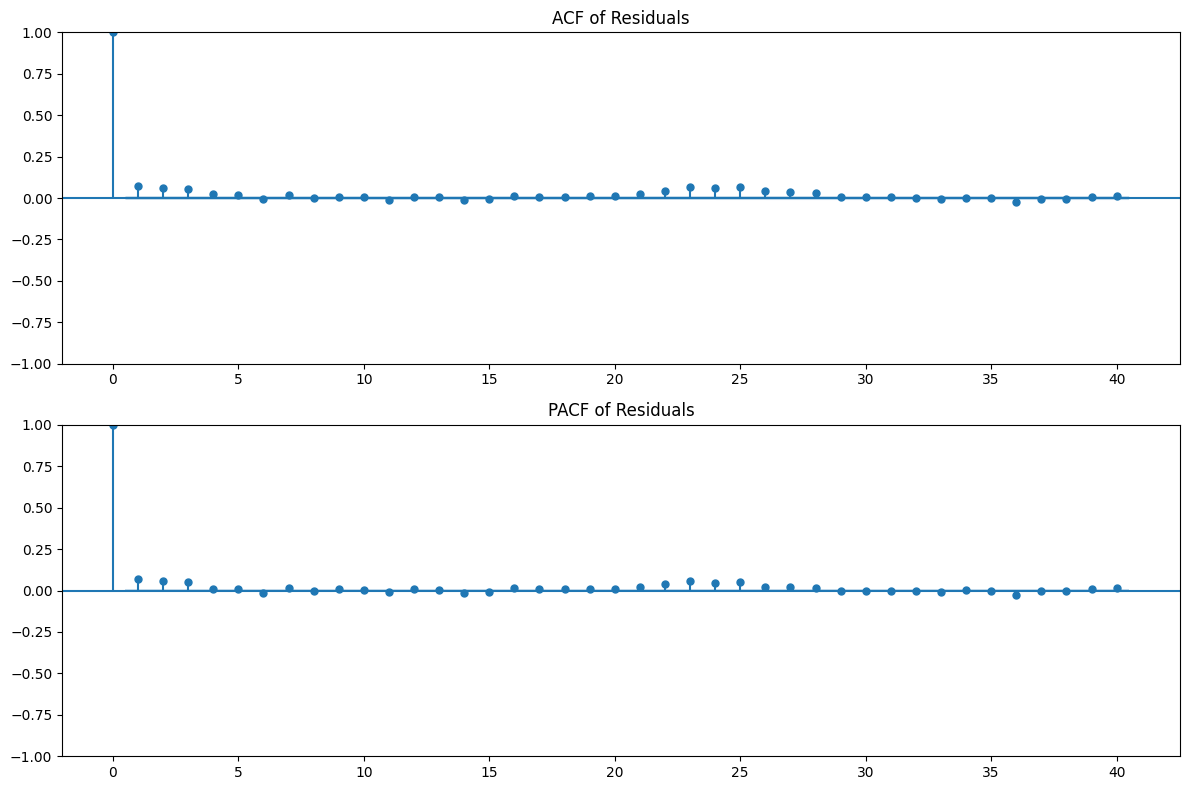

In [62]:
# 4. Model Diagnostics
def model_diagnostics(results):
    # Plot residual diagnostics
    results.plot_diagnostics(figsize=(15, 12))
    plt.show()

    # Perform Ljung-Box test
    residuals = results.resid
    lb_test = acorr_ljungbox(residuals, lags=[10, 20, 30], return_df=True)
    print("Ljung-Box Test Results:")
    print(lb_test)

    # Check for remaining autocorrelation
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(residuals, ax=ax1, lags=40)
    ax1.set_title('ACF of Residuals')
    plot_pacf(residuals, ax=ax2, lags=40)
    ax2.set_title('PACF of Residuals')
    plt.tight_layout()
    plt.show()

model_diagnostics(results)

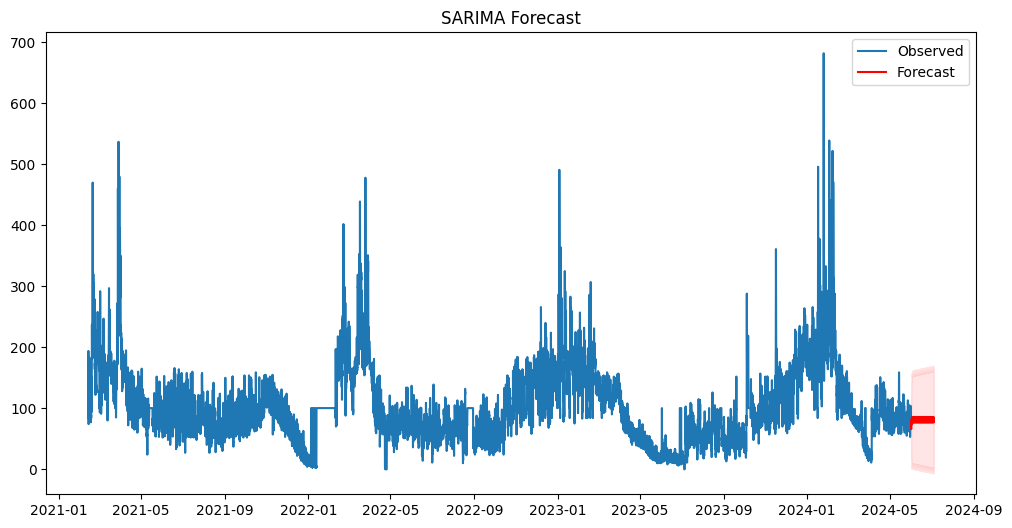


Forecast for the next 800 periods:
2024-06-01 01:00:00    69.839994
2024-06-01 02:00:00    67.438515
2024-06-01 03:00:00    66.723727
2024-06-01 04:00:00    66.051665
2024-06-01 05:00:00    66.360351
                         ...    
2024-07-04 04:00:00    77.599094
2024-07-04 05:00:00    77.108373
2024-07-04 06:00:00    78.400116
2024-07-04 07:00:00    80.715959
2024-07-04 08:00:00    83.279720
Freq: H, Name: predicted_mean, Length: 800, dtype: float64


In [63]:
# Forecast
forecast_steps = 800  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data2.index, data2['AQI'], label='Observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='r', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='r', alpha=0.1)
plt.legend()
plt.title('SARIMA Forecast')
plt.show()

# Print forecast values
print("\nForecast for the next", forecast_steps, "periods:")
print(forecast.predicted_mean)

# Prophet

In [64]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_plotly, plot_components_plotly
import warnings
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
from prophet import Prophet
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [65]:
data.head()

,ds,NowCastConc.,y,AQI,AQI Category
0,2021-02-12 21:00:00,44.182402,132.30000,84.0,Moderate
1,2021-02-12 22:00:00,139.600000,146.30000,194.0,Unhealthy
2,2021-02-12 23:00:00,116.800000,92.20000,183.0,Unhealthy
3,2021-02-13 00:00:00,116.800000,44.15719,183.0,Unhealthy
4,2021-02-13 01:00:00,65.200000,44.10000,156.0,Unhealthy


In [66]:
data3 = data.copy()

In [67]:
# Splitting the data into training and validation sets
split_date = '2024-01-01 00:00:00'
train = data3[data3['ds'] < split_date]
test = data3[data3['ds'] >= split_date]

print(f"train shape : {train.shape} and test shape : {test.shape}")

train shape : (25251, 5) and test shape : (3649, 5)


In [68]:
# Create and fit the Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4ra51ryd/m_bi73bp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4ra51ryd/bhhzfn4k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72742', 'data', 'file=/tmp/tmp4ra51ryd/m_bi73bp.json', 'init=/tmp/tmp4ra51ryd/bhhzfn4k.json', 'output', 'file=/tmp/tmp4ra51ryd/prophet_model6oglc6di/prophet_model-20240926113436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:34:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:35:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Inference

In [69]:
# Generate future dates for forecasting
future = model.make_future_dataframe(periods=365)  # Forecast for the next year
forecast = model.predict(future)

In [70]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-12 21:00:00,81.816833,80.424047,169.717338,81.816833,81.816833,43.726927,43.726927,43.726927,-0.339616,-0.339616,-0.339616,44.066543,44.066543,44.066543,0.0,0.0,0.0,125.543760
1,2021-02-12 22:00:00,81.864957,79.533328,169.592733,81.864957,81.864957,43.503793,43.503793,43.503793,-0.449873,-0.449873,-0.449873,43.953667,43.953667,43.953667,0.0,0.0,0.0,125.368751
2,2021-02-12 23:00:00,81.913082,81.467507,165.730565,81.913082,81.913082,43.292454,43.292454,43.292454,-0.548043,-0.548043,-0.548043,43.840497,43.840497,43.840497,0.0,0.0,0.0,125.205536
3,2021-02-13 00:00:00,81.961207,82.984929,169.361357,81.961207,81.961207,43.092593,43.092593,43.092593,-0.634442,-0.634442,-0.634442,43.727035,43.727035,43.727035,0.0,0.0,0.0,125.053800
4,2021-02-13 01:00:00,82.009331,81.559415,170.384680,82.009331,82.009331,42.903746,42.903746,42.903746,-0.709535,-0.709535,-0.709535,43.613282,43.613282,43.613282,0.0,0.0,0.0,124.913077


In [71]:
# Plot components
fig_components = plot_components_plotly(model, forecast)
fig_components.update_layout(height=1200, width=900, title_text="Trend and Seasonality Components")

# Display the plot
fig_components.show()

Output hidden; open in https://colab.research.google.com to view.

In [72]:
# Monthly seasonality plot
model_monthly = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
model_monthly.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_monthly.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4ra51ryd/xi890x86.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4ra51ryd/mi817avv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94439', 'data', 'file=/tmp/tmp4ra51ryd/xi890x86.json', 'init=/tmp/tmp4ra51ryd/mi817avv.json', 'output', 'file=/tmp/tmp4ra51ryd/prophet_modelzfni7rj2/prophet_model-20240926113516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:35:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:35:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [73]:
future_monthly = model_monthly.make_future_dataframe(periods=30)
forecast_monthly = model_monthly.predict(future_monthly)

In [74]:
fig_monthly = plot_components_plotly(model_monthly, forecast_monthly)
fig_monthly.update_layout(height=600, width=900, title_text="Monthly Seasonality")

# Display the monthly plot
fig_monthly.show()

Output hidden; open in https://colab.research.google.com to view.

In [75]:
# Yearly seasonality plot
if (data['ds'].max() - data['ds'].min()).days > 365:
    model_yearly = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model_yearly.fit(data)

    future_yearly = model_yearly.make_future_dataframe(periods=365)
    forecast_yearly = model_yearly.predict(future_yearly)

    fig_yearly = plot_components_plotly(model_yearly, forecast_yearly)
    fig_yearly.update_layout(height=600, width=900, title_text="Yearly Seasonality")

    # Display the yearly plot
    fig_yearly.show()

Output hidden; open in https://colab.research.google.com to view.

In [76]:
# Print some statistics about the components
print("Trend:")
print(forecast[['ds', 'trend']].describe())

print("\nYearly Seasonality:")
print(forecast[['ds', 'yearly']].describe())

print("\nWeekly Seasonality:")
print(forecast[['ds', 'weekly']].describe())

Trend:
                                  ds         trend
count                          29265  29265.000000
mean   2022-10-17 17:29:44.315735552     47.411379
min              2021-02-12 21:00:00    -39.908720
25%              2021-12-14 17:00:00     28.051625
50%              2022-10-15 13:00:00     43.341471
75%              2023-08-16 09:00:00     62.171083
max              2025-06-01 00:00:00    151.990669
std                              NaN     33.590682

Yearly Seasonality:
                                  ds        yearly
count                          29265  29265.000000
mean   2022-10-17 17:29:44.315735552     -2.396266
min              2021-02-12 21:00:00    -61.511648
25%              2021-12-14 17:00:00    -32.666472
50%              2022-10-15 13:00:00     -7.445092
75%              2023-08-16 09:00:00     23.148237
max              2025-06-01 00:00:00     72.534155
std                              NaN     36.626765

Weekly Seasonality:
                                 

## Model evaluation

In [77]:
test.columns

Index(['ds', 'NowCastConc.', 'y', 'AQI', 'AQI Category'], dtype='object')

In [78]:
y_pred = forecast[forecast['ds'] >= split_date][['ds', 'yhat']]

result = pd.merge(test, y_pred, how='inner')

result.shape

(3649, 6)

In [79]:
result.head()

,ds,NowCastConc.,y,AQI,AQI Category,yhat
0,2024-01-01 00:00:00,163.2,166.6,214.0,Very Unhealthy,95.311905
1,2024-01-01 01:00:00,162.2,161.2,237.0,Very Unhealthy,95.369887
2,2024-01-01 02:00:00,137.6,113.0,213.0,Very Unhealthy,95.443606
3,2024-01-01 03:00:00,101.9,66.2,184.0,Unhealthy,95.533151
4,2024-01-01 04:00:00,85.6,69.3,172.0,Unhealthy,95.638452


In [80]:
#calculate rmse and mae
rmse = np.sqrt(np.mean((result['y']-result['yhat'])**2))
mae = (np.mean(np.abs(result['y']-result['yhat'])))

print(f"RMSE from Univariate Analysis is : {rmse}")
print(f"MAE from Univariate Analysis is : {mae}")

RMSE from Univariate Analysis is : 40.583471703764566
MAE from Univariate Analysis is : 27.368670323765866


## Visualization

<Axes: xlabel='ds'>

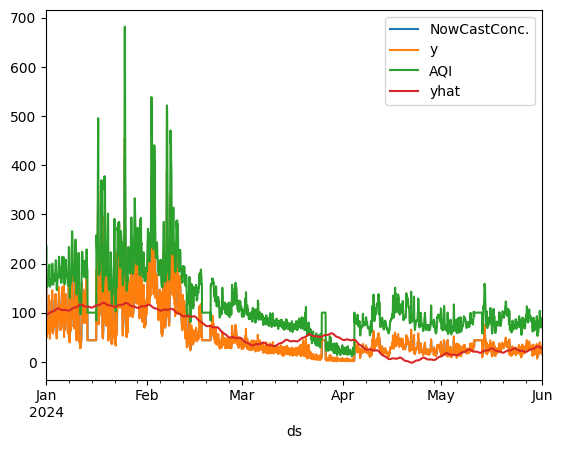

In [81]:
result.set_index('ds').plot()

In [82]:
perf_df = pd.DataFrame({"model": ["Univariate"], "RMSE": [rmse], "MAE": [mae]})
perf_df.head()

,model,RMSE,MAE
0,Univariate,40.583472,27.36867


## Multivariant

In [83]:
og_data.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,Abuja,PM2.5 - Principal,2021-02-12 09:00 PM,2021,2,12,21,44.182402,84,Moderate,132.30000,UG/M3,1 Hr,Valid
1,Abuja,PM2.5 - Principal,2021-02-12 10:00 PM,2021,2,12,22,139.600000,194,Unhealthy,146.30000,UG/M3,1 Hr,Valid
2,Abuja,PM2.5 - Principal,2021-02-12 11:00 PM,2021,2,12,23,116.800000,183,Unhealthy,92.20000,UG/M3,1 Hr,Valid
3,Abuja,PM2.5 - Principal,2021-02-13 12:00 AM,2021,2,13,0,116.800000,183,Unhealthy,44.15719,UG/M3,1 Hr,Missing
4,Abuja,PM2.5 - Principal,2021-02-13 01:00 AM,2021,2,13,1,65.200000,156,Unhealthy,44.10000,UG/M3,1 Hr,Valid


In [84]:
data4 = og_data.copy()

In [85]:
data4.nunique()

,0
Site,1
Parameter,1
Date (LT),26906
Year,4
Month,12
Day,31
Hour,24
NowCast Conc.,2265
AQI,438
AQI Category,6


In [86]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26906 entries, 0 to 26905
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           26906 non-null  object 
 1   Parameter      26906 non-null  object 
 2   Date (LT)      26906 non-null  object 
 3   Year           26906 non-null  int64  
 4   Month          26906 non-null  int64  
 5   Day            26906 non-null  int64  
 6   Hour           26906 non-null  int64  
 7   NowCast Conc.  26906 non-null  float64
 8   AQI            26906 non-null  int64  
 9   AQI Category   26906 non-null  object 
 10  Raw Conc.      26906 non-null  float64
 11  Conc. Unit     26906 non-null  object 
 12  Duration       26906 non-null  object 
 13  QC Name        26906 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 2.9+ MB


In [87]:
import pandas as pd

# Columns to encode (excluding 'Date (LT)' as it's not categorical)
columns_to_encode = ['Site', 'Parameter', 'AQI Category', 'Conc. Unit', 'Duration', 'QC Name']

# Perform one-hot encoding
data4_encoded = pd.get_dummies(data4, columns=columns_to_encode)

In [88]:
data4_encoded.head()

,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.,Site_Abuja,Parameter_PM2.5 - Principal,...,AQI Category_Moderate,AQI Category_Unhealthy,AQI Category_Unhealthy for Sensitive Groups,AQI Category_Very Unhealthy,Conc. Unit_UG/M3,Duration_1 Hr,QC Name_Invalid,QC Name_Missing,QC Name_Suspect,QC Name_Valid
0,2021-02-12 09:00 PM,2021,2,12,21,44.182402,84,132.30000,True,True,...,True,False,False,False,True,True,False,False,False,True
1,2021-02-12 10:00 PM,2021,2,12,22,139.600000,194,146.30000,True,True,...,False,True,False,False,True,True,False,False,False,True
2,2021-02-12 11:00 PM,2021,2,12,23,116.800000,183,92.20000,True,True,...,False,True,False,False,True,True,False,False,False,True
3,2021-02-13 12:00 AM,2021,2,13,0,116.800000,183,44.15719,True,True,...,False,True,False,False,True,True,False,True,False,False
4,2021-02-13 01:00 AM,2021,2,13,1,65.200000,156,44.10000,True,True,...,False,True,False,False,True,True,False,False,False,True


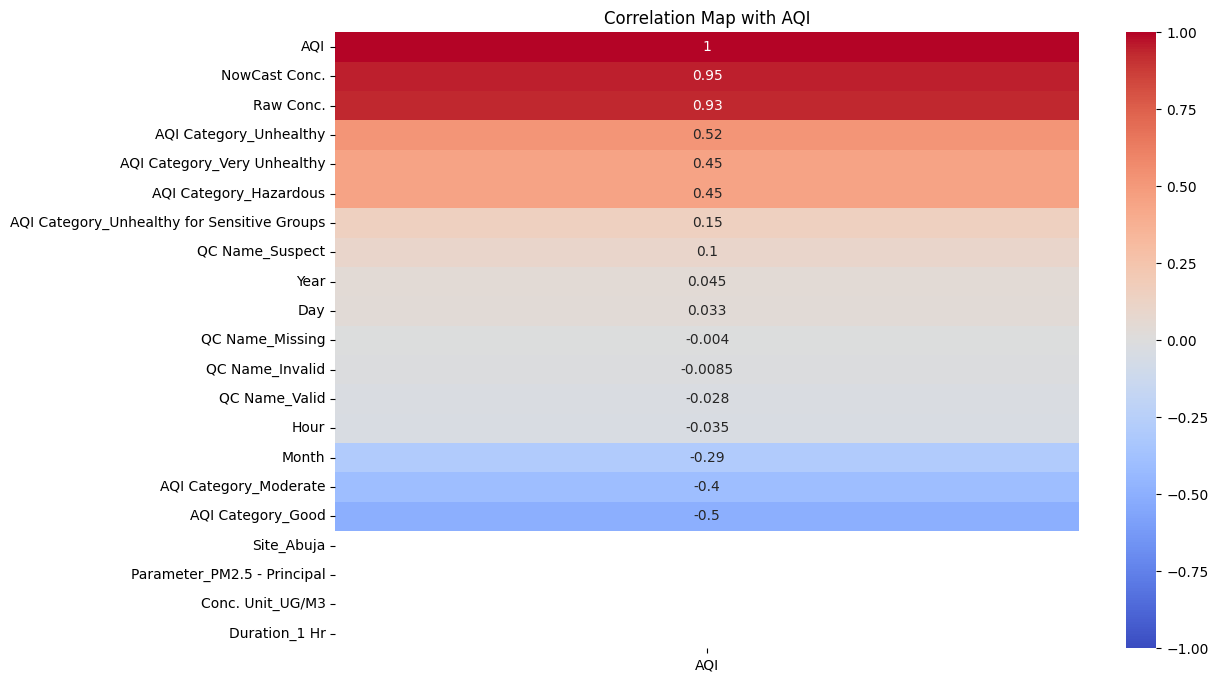

In [89]:
# Calculate the correlation matrix
correlation_matrix = data4_encoded.drop("Date (LT)", axis=1).corr()

# Create a heatmap of the correlation matrix with 'AQI' as the focus
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['AQI']].sort_values(by='AQI', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Map with AQI')
plt.show()

In [90]:
data4_encoded.drop(columns = ['Site_Abuja', 'Parameter_PM2.5 - Principal', 'Conc. Unit_UG/M3', 'Duration_1 Hr'], inplace = True)

In [91]:
data4_encoded = data4_encoded.rename(columns={'Date (LT)': 'ds', 'AQI': 'y'})
data4_encoded.head()

,ds,Year,Month,Day,Hour,NowCast Conc.,y,Raw Conc.,AQI Category_Good,AQI Category_Hazardous,AQI Category_Moderate,AQI Category_Unhealthy,AQI Category_Unhealthy for Sensitive Groups,AQI Category_Very Unhealthy,QC Name_Invalid,QC Name_Missing,QC Name_Suspect,QC Name_Valid
0,2021-02-12 09:00 PM,2021,2,12,21,44.182402,84,132.30000,False,False,True,False,False,False,False,False,False,True
1,2021-02-12 10:00 PM,2021,2,12,22,139.600000,194,146.30000,False,False,False,True,False,False,False,False,False,True
2,2021-02-12 11:00 PM,2021,2,12,23,116.800000,183,92.20000,False,False,False,True,False,False,False,False,False,True
3,2021-02-13 12:00 AM,2021,2,13,0,116.800000,183,44.15719,False,False,False,True,False,False,False,True,False,False
4,2021-02-13 01:00 AM,2021,2,13,1,65.200000,156,44.10000,False,False,False,True,False,False,False,False,False,True


In [92]:
data4_encoded['ds'] = pd.to_datetime(data4_encoded['ds'], format='%Y-%m-%d %I:%M %p')

In [93]:
# Reorder columns, moving 'y' to the second position
data4_encoded = data4_encoded[['ds', 'y'] + [col for col in data4_encoded.columns if col not in ['ds', 'y']]]


In [94]:
# Splitting the data into training and validation sets
split_date = '2024-01-01 00:00:00'
train = data4_encoded[data4_encoded['ds'] < split_date]
test = data4_encoded[data4_encoded['ds'] >= split_date]

print(f"train shape : {train.shape} and test shape : {test.shape}")

train shape : (23472, 18) and test shape : (3434, 18)


In [95]:
data4_encoded.columns

Index(['ds', 'y', 'Year', 'Month', 'Day', 'Hour', 'NowCast Conc.', 'Raw Conc.',
       'AQI Category_Good', 'AQI Category_Hazardous', 'AQI Category_Moderate',
       'AQI Category_Unhealthy', 'AQI Category_Unhealthy for Sensitive Groups',
       'AQI Category_Very Unhealthy', 'QC Name_Invalid', 'QC Name_Missing',
       'QC Name_Suspect', 'QC Name_Valid'],
      dtype='object')

In [96]:
# Initializing the Prophet model for multivariate analysis
model3 = Prophet()

# Adding the additional regressors
for column in data4_encoded.columns[2:]:
    print(column)
    model3.add_regressor(column)

Year
Month
Day
Hour
NowCast Conc.
Raw Conc.
AQI Category_Good
AQI Category_Hazardous
AQI Category_Moderate
AQI Category_Unhealthy
AQI Category_Unhealthy for Sensitive Groups
AQI Category_Very Unhealthy
QC Name_Invalid
QC Name_Missing
QC Name_Suspect
QC Name_Valid


In [97]:
# Fit the model
model3.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4ra51ryd/v2mb_f24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4ra51ryd/i3j3c205.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32619', 'data', 'file=/tmp/tmp4ra51ryd/v2mb_f24.json', 'init=/tmp/tmp4ra51ryd/i3j3c205.json', 'output', 'file=/tmp/tmp4ra51ryd/prophet_modelbw033zjv/prophet_model-20240926113635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:36:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:37:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Inference

In [98]:
train.head()

,ds,y,Year,Month,Day,Hour,NowCast Conc.,Raw Conc.,AQI Category_Good,AQI Category_Hazardous,AQI Category_Moderate,AQI Category_Unhealthy,AQI Category_Unhealthy for Sensitive Groups,AQI Category_Very Unhealthy,QC Name_Invalid,QC Name_Missing,QC Name_Suspect,QC Name_Valid
0,2021-02-12 21:00:00,84,2021,2,12,21,44.182402,132.30000,False,False,True,False,False,False,False,False,False,True
1,2021-02-12 22:00:00,194,2021,2,12,22,139.600000,146.30000,False,False,False,True,False,False,False,False,False,True
2,2021-02-12 23:00:00,183,2021,2,12,23,116.800000,92.20000,False,False,False,True,False,False,False,False,False,True
3,2021-02-13 00:00:00,183,2021,2,13,0,116.800000,44.15719,False,False,False,True,False,False,False,True,False,False
4,2021-02-13 01:00:00,156,2021,2,13,1,65.200000,44.10000,False,False,False,True,False,False,False,False,False,True


In [99]:
test.head()

,ds,y,Year,Month,Day,Hour,NowCast Conc.,Raw Conc.,AQI Category_Good,AQI Category_Hazardous,AQI Category_Moderate,AQI Category_Unhealthy,AQI Category_Unhealthy for Sensitive Groups,AQI Category_Very Unhealthy,QC Name_Invalid,QC Name_Missing,QC Name_Suspect,QC Name_Valid
23472,2024-01-01 00:00:00,214,2024,1,1,0,163.2,166.6,False,False,False,False,False,True,False,False,False,True
23473,2024-01-01 01:00:00,237,2024,1,1,1,162.2,161.2,False,False,False,False,False,True,False,False,False,True
23474,2024-01-01 02:00:00,213,2024,1,1,2,137.6,113.0,False,False,False,False,False,True,False,False,False,True
23475,2024-01-01 03:00:00,184,2024,1,1,3,101.9,66.2,False,False,False,True,False,False,False,False,False,True
23476,2024-01-01 04:00:00,172,2024,1,1,4,85.6,69.3,False,False,False,True,False,False,False,False,False,True


In [100]:
data4_encoded.head()

,ds,y,Year,Month,Day,Hour,NowCast Conc.,Raw Conc.,AQI Category_Good,AQI Category_Hazardous,AQI Category_Moderate,AQI Category_Unhealthy,AQI Category_Unhealthy for Sensitive Groups,AQI Category_Very Unhealthy,QC Name_Invalid,QC Name_Missing,QC Name_Suspect,QC Name_Valid
0,2021-02-12 21:00:00,84,2021,2,12,21,44.182402,132.30000,False,False,True,False,False,False,False,False,False,True
1,2021-02-12 22:00:00,194,2021,2,12,22,139.600000,146.30000,False,False,False,True,False,False,False,False,False,True
2,2021-02-12 23:00:00,183,2021,2,12,23,116.800000,92.20000,False,False,False,True,False,False,False,False,False,True
3,2021-02-13 00:00:00,183,2021,2,13,0,116.800000,44.15719,False,False,False,True,False,False,False,True,False,False
4,2021-02-13 01:00:00,156,2021,2,13,1,65.200000,44.10000,False,False,False,True,False,False,False,False,False,True


In [101]:
# Making predictions on the validation set
future_multi = model3.make_future_dataframe(periods=10)

#add all the additional columns to future_multi
future_multi = pd.merge(future_multi, data4_encoded.drop("y", axis=1),how='left', on='ds')

forecast_multi = model3.predict(future_multi)

forecast_multi.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,AQI Category_Good,AQI Category_Good_lower,AQI Category_Good_upper,AQI Category_Hazardous,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-12 21:00:00,181.704690,84.813043,104.439650,181.704690,181.704690,0.0,0.0,0.0,0.0,...,0.204271,0.204271,0.204271,4.825431,4.825431,4.825431,0.0,0.0,0.0,94.965881
1,2021-02-12 22:00:00,181.703535,195.977064,215.107288,181.703535,181.703535,0.0,0.0,0.0,0.0,...,0.157340,0.157340,0.157340,4.833889,4.833889,4.833889,0.0,0.0,0.0,205.827318
2,2021-02-12 23:00:00,181.702381,178.189047,197.337347,181.702381,181.702381,0.0,0.0,0.0,0.0,...,0.108879,0.108879,0.108879,4.842321,4.842321,4.842321,0.0,0.0,0.0,187.927970
3,2021-02-13 00:00:00,181.701226,177.841041,196.398221,181.701226,181.701226,0.0,0.0,0.0,0.0,...,0.059291,0.059291,0.059291,4.850726,4.850726,4.850726,0.0,0.0,0.0,187.105785
4,2021-02-13 01:00:00,181.700072,136.563182,156.012632,181.700072,181.700072,0.0,0.0,0.0,0.0,...,0.008984,0.008984,0.008984,4.859104,4.859104,4.859104,0.0,0.0,0.0,146.412628


In [102]:
forecast_multi.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,AQI Category_Good,AQI Category_Good_lower,AQI Category_Good_upper,AQI Category_Hazardous,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
23477,2024-01-06 23:00:00,-41.904940,179.161319,198.489121,-41.904940,-41.904940,0.0,0.0,0.0,0.0,...,-0.642416,-0.642416,-0.642416,-2.189309,-2.189309,-2.189309,0.0,0.0,0.0,189.229997
23478,2024-01-07 23:00:00,-42.041649,197.622837,217.462629,-42.041649,-42.041649,0.0,0.0,0.0,0.0,...,-0.501662,-0.501662,-0.501662,-2.094127,-2.094127,-2.094127,0.0,0.0,0.0,207.039489
23479,2024-01-08 23:00:00,-42.178358,224.843530,243.850648,-42.178358,-42.178358,0.0,0.0,0.0,0.0,...,-0.283949,-0.283949,-0.283949,-1.979534,-1.979534,-1.979534,0.0,0.0,0.0,234.491439
23480,2024-01-09 23:00:00,-42.315067,208.231401,227.202593,-42.315067,-42.282142,0.0,0.0,0.0,0.0,...,0.775460,0.775460,0.775460,-1.848094,-1.848094,-1.848094,0.0,0.0,0.0,218.104776
23481,2024-01-10 23:00:00,-42.451776,189.988471,209.263563,-42.451776,-42.341669,0.0,0.0,0.0,0.0,...,0.154430,0.154430,0.154430,-1.702431,-1.702431,-1.702431,0.0,0.0,0.0,199.893097


In [103]:
y_pred_df_multi = forecast_multi[forecast_multi['ds'] >= split_date][['ds', 'yhat']]

result = pd.merge(test[['ds', 'y']], y_pred_df_multi, how='inner')

result.head()

,ds,y,yhat
0,2024-01-01 23:00:00,196,185.579144
1,2024-01-02 23:00:00,191,181.022045
2,2024-01-03 23:00:00,207,186.830978
3,2024-01-04 23:00:00,214,193.048698
4,2024-01-05 23:00:00,214,192.515262


In [104]:
#calculate rmse
rmse = np.sqrt(np.mean((result['y']-result['yhat'])**2))
mae = (np.mean(np.abs(result['y']-result['yhat'])))

print(f"RMSE from Multivariate Analysis is : {rmse}")
print(f"MAE from Multivariate Analysis is : {mae}")

RMSE from Multivariate Analysis is : 20.94287847598505
MAE from Multivariate Analysis is : 19.724507517394763


In [105]:
perf_df = pd.concat([perf_df, pd.DataFrame({"model":["Multivariate"], "RMSE":[rmse], "MAE":[mae]})])
perf_df.head()

,model,RMSE,MAE
0,Univariate,40.583472,27.368670
0,Multivariate,20.942878,19.724508


<Axes: xlabel='ds'>

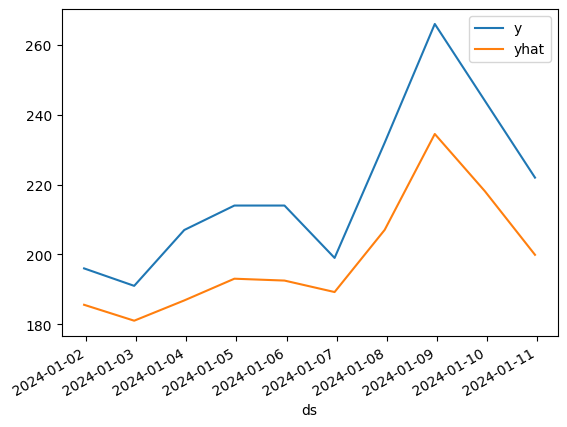

In [106]:
result.set_index('ds').dropna().plot()

### Univariate and MuliVariate Modeling

<Axes: xlabel='model'>

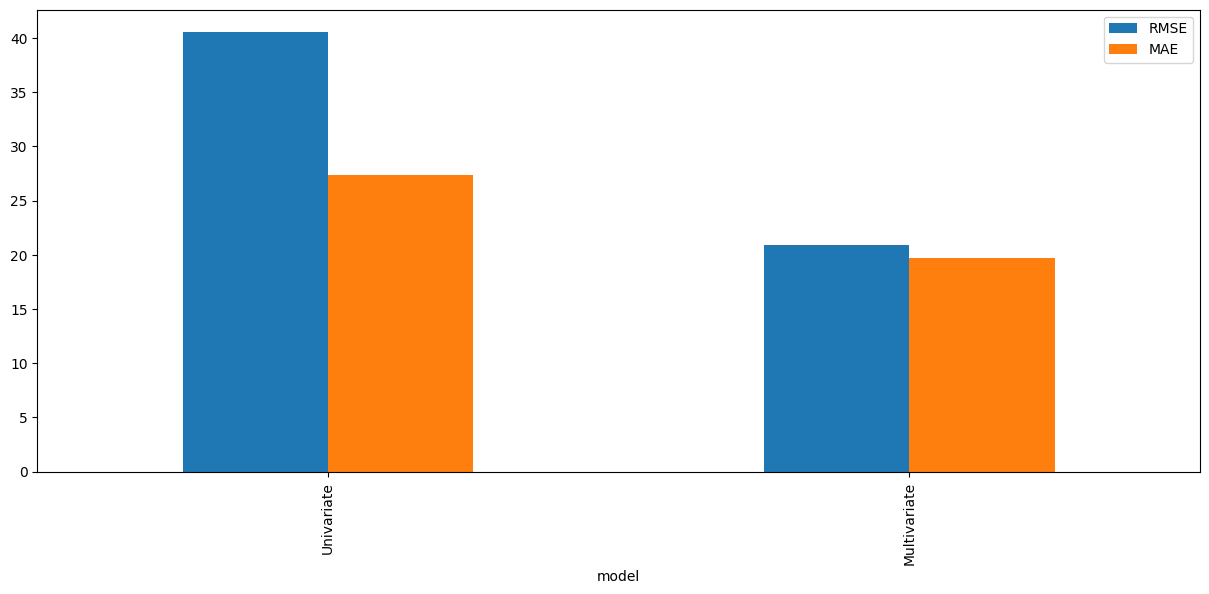

In [107]:
# Error Analysis
perf_df.set_index("model").plot(kind='bar', figsize=(15, 6))

In [108]:
# Prediction Analysis
y = test[['ds', 'y']].rename({"ds":"date", "y":"Actual"}, axis=1)
y_pred_df_multi = y_pred_df_multi.rename({"ds":"date", "yhat":"Multivariate Prediction"}, axis=1)
y_pred_df_uni = y_pred.rename({"ds":"date", "yhat":"Univariate Prediction"}, axis=1)

plot_df = pd.merge(y_pred_df_multi, y, on=["date"], how="inner")
plot_df = pd.merge(plot_df, y_pred_df_uni, on=["date"], how="inner").set_index("date")

plot_df.head()

,Multivariate Prediction,Actual,Univariate Prediction
date,,,
2024-01-01 23:00:00,185.579144,196,99.556493
2024-01-02 23:00:00,181.022045,191,102.346549
2024-01-03 23:00:00,186.830978,207,106.340773
2024-01-04 23:00:00,193.048698,214,108.612213
2024-01-05 23:00:00,192.515262,214,105.456743


<Axes: xlabel='date'>

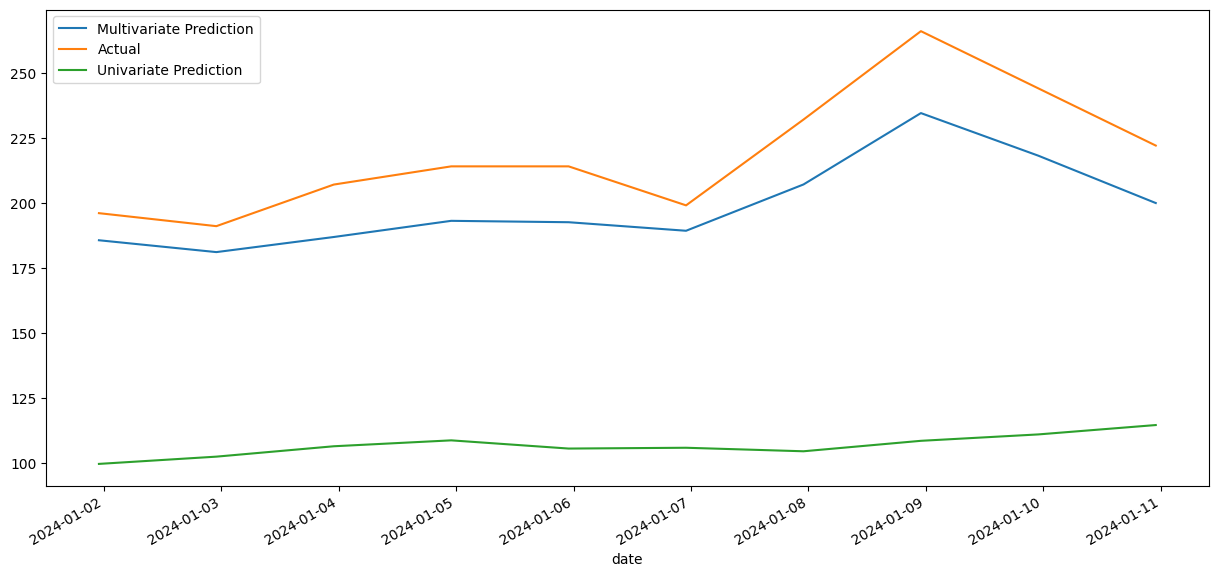

In [109]:
plot_df.plot(figsize=(15, 7))

# Transformer

In [110]:
data5 = data4_encoded.copy()

In [111]:
data5.head()

,ds,y,Year,Month,Day,Hour,NowCast Conc.,Raw Conc.,AQI Category_Good,AQI Category_Hazardous,AQI Category_Moderate,AQI Category_Unhealthy,AQI Category_Unhealthy for Sensitive Groups,AQI Category_Very Unhealthy,QC Name_Invalid,QC Name_Missing,QC Name_Suspect,QC Name_Valid
0,2021-02-12 21:00:00,84,2021,2,12,21,44.182402,132.30000,False,False,True,False,False,False,False,False,False,True
1,2021-02-12 22:00:00,194,2021,2,12,22,139.600000,146.30000,False,False,False,True,False,False,False,False,False,True
2,2021-02-12 23:00:00,183,2021,2,12,23,116.800000,92.20000,False,False,False,True,False,False,False,False,False,True
3,2021-02-13 00:00:00,183,2021,2,13,0,116.800000,44.15719,False,False,False,True,False,False,False,True,False,False
4,2021-02-13 01:00:00,156,2021,2,13,1,65.200000,44.10000,False,False,False,True,False,False,False,False,False,True


In [112]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Assuming data5 is your DataFrame
X = data5['ds']
y = data5['y']

In [113]:
# Convert datetime to numeric
X = pd.to_numeric(pd.to_datetime(X))

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X.values.reshape(-1, 1))
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [114]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

# Reshape input to be [samples, time steps, features]
X_train = X_train.view(X_train.shape[0], 1, 1)
X_test = X_test.view(X_test.shape[0], 1, 1)

In [115]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [116]:
# Define the model
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(1, 50, batch_first=True)
        self.dropout1 = nn.Dropout(0.2)
        self.lstm2 = nn.LSTM(50, 50, batch_first=True)
        self.dropout2 = nn.Dropout(0.2)
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        x, _ = self.lstm1(x)
        x = self.dropout1(x)
        x, _ = self.lstm2(x)
        x = self.dropout2(x)
        x = self.fc(x[:, -1, :])
        return x

model = LSTMModel()

In [ ]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        train_loss = criterion(model(X_train), y_train).item()
        val_loss = criterion(model(X_test), y_test).item()
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

Epoch [10/100], Train Loss: 0.0078, Val Loss: 0.0078
Epoch [20/100], Train Loss: 0.0073, Val Loss: 0.0073
Epoch [30/100], Train Loss: 0.0073, Val Loss: 0.0072
Epoch [40/100], Train Loss: 0.0056, Val Loss: 0.0057
Epoch [50/100], Train Loss: 0.0041, Val Loss: 0.0042
Epoch [60/100], Train Loss: 0.0035, Val Loss: 0.0035
Epoch [70/100], Train Loss: 0.0031, Val Loss: 0.0031
Epoch [80/100], Train Loss: 0.0028, Val Loss: 0.0028
Epoch [90/100], Train Loss: 0.0027, Val Loss: 0.0027
Epoch [100/100], Train Loss: 0.0026, Val Loss: 0.0027


In [ ]:
# Evaluate the model
model.eval()
with torch.no_grad():
    train_loss = criterion(model(X_train), y_train).item()
    test_loss = criterion(model(X_test), y_test).item()
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Train Loss: 0.0026
Test Loss: 0.0027


In [ ]:
# Make predictions
y_pred = model(X_test).detach().numpy()

# Inverse transform the predictions
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

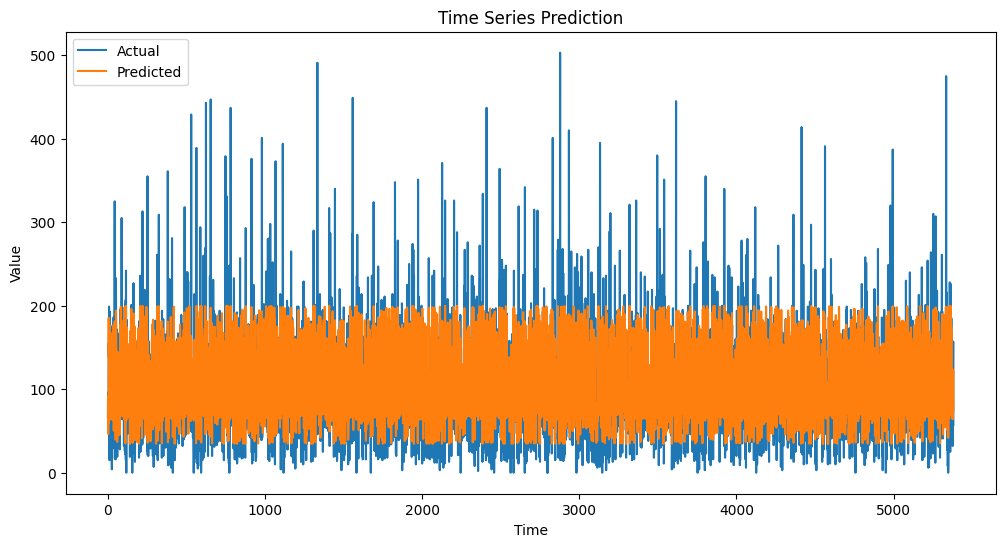

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Time Series Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

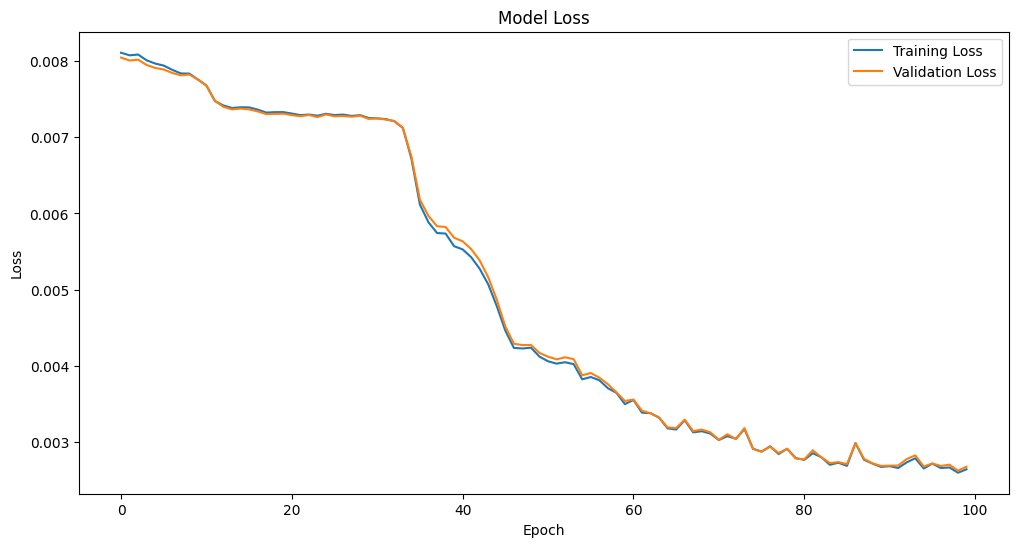

In [ ]:
# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()